This script is used to test the modules.

In [1]:
%matplotlib inline

import numpy as np
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
import os
import statistics

(456, 241, 480)
The input data does not have the dimension of month.


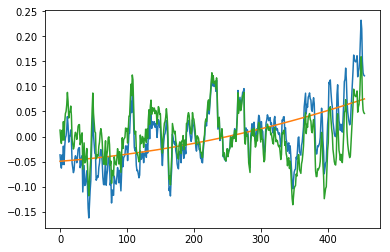

In [3]:
if __name__=="__main__":
    # sample
    datapath_ERAI_fields = '/home/yang/workbench/Core_Database_AMET_OMET_reanalysis/ERAI/regression'
    dataset_ERAI_fields_SIC_SST_SLP = Dataset(datapath_ERAI_fields + os.sep + 'surface_ERAI_monthly_regress_1979_2016.nc')
    SST_ERAI_series = dataset_ERAI_fields_SIC_SST_SLP.variables['sst'][:]
    time_ERAI = dataset_ERAI_fields_SIC_SST_SLP.variables['time'][:]
    SST_ERAI_mask = np.ma.getmaskarray(SST_ERAI_series[0,:,:])
    SST_ERAI_mask_3D = np.repeat(SST_ERAI_mask[np.newaxis,:,:],len(time_ERAI),0)
    SST_ERAI_series[SST_ERAI_mask_3D==True] = 0
    del SST_ERAI_mask_3D
    print (SST_ERAI_series.shape)
    SST_mean = np.mean(np.mean(SST_ERAI_series,2),1)
    instance = statistics.operator(SST_mean)
    instance.anomaly(mode=1) # input doesn't have dimension [month]
    instance.detrend()
    plt.plot(instance._anomaly)
    plt.plot(instance._polyfit)
    plt.plot(instance._detrend)
    